# Case study 1 - tropical cyclones in Mozambique

In 2019 Mozambique was listed as the country most affected by natural hazard extremes by the organization Germanwatch e.V. (Eckstein et al, 2021). That year the TC Idai and Kenneth led to devastating damages, also with severe consequences for the health sector (UNDP, 2019).

In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.cm as cm_mp
from matplotlib.colors import LinearSegmentedColormap
import cartopy.crs as ccrs
from pathlib import Path

from climada.hazard.base import Hazard
from climada.hazard import TCTracks
from climada.hazard import TropCyclone
from climada.entity import ImpactFuncSet
from climada.entity.impact_funcs.trop_cyclone import ImpfSetTropCyclone
from climada.entity.impact_funcs.storm_europe import ImpfStormEurope
from climada.engine import Impact
import climada.util.coordinates as u_coord

import functions as fct

#Define directories
home = str(Path.home())
project_path = home+'/Documents/CLIMADA/own_projects/parametric_casestudy/data/' 
figures_path = home+'/Library/CloudStorage/Dropbox/Aplicaciones/Overleaf/WP1_Parametric_paper_V2/art/'

#Plotting settings
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = '11'
cm = 1/2.54  # centimeters in inches
fig_width = 17.4 #cm
max_fig_height = 23.4 #cm
horizontal_plots_height = 4 #inch

In [28]:
#Define region of interest
country_iso = 'MOZ'
country_name = 'mozambique'
basin = "SI"
impf_id = 5
bounds = [30, -26, 41, -10] # [lon_min , lat_min, lon_max, lat_max]

In [29]:
#Get hazard and exposure data
hazard_name = 'tc'
hazard, hazard_present_folder, hospitals, insured = fct.wrapper_haz_exp(hazard_name, country_iso, country_name, impf_id, 
                                             project_path, basin, bounds)

/Users/carmenst/micromamba/envs/climada_env_mamba/lib/python3.9/pickle.py:1717: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  setstate(state)
/Users/carmenst/micromamba/envs/climada_env_mamba/lib/python3.9/pickle.py:1717: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  setstate(state)


In [31]:
#Get names of regions in Mozambique
hospitals_plot = hospitals.gdf.set_crs(epsg=4326).to_crs(epsg=3857) #cartesian coordinate system
admin1_info, admin1_geo = u_coord.get_admin1_info(country_iso)
b = admin1_info[country_iso]

reg_names = []
for liste in b:
    reg_names.append((liste['name']))

In [32]:
#impact function
impf = ImpfSetTropCyclone.from_calibrated_regional_ImpfSet()

In [33]:
#calibration with synthetic impacts 
impact_syn = Impact()
impact_syn.calc(hospitals, impf, hazard.select(orig=False), save_mat=True)

2023-07-14 21:47:54,507 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.


In [34]:
#Parametric options
#Generate hazards in a circle
radius = np.array([10, 20, 30, 40, 50])*1000 #meter
fct.wrapper_generate_haz_in_a_circle(hazard, hospitals, hazard_name, hazard_present_folder, radius)

#Define payout function as step function with the thresholds 'categories' and payout steps of 25%
steps = 25
categories = np.array([43, 50, 59, 70])
payout_options = fct.generate_payout_options(steps, categories)

payouts_syn, list_radius, list_payout_structure = fct.compute_payout(hazard_name, payout_options, categories, 
                                                                    radius, hazard_present_folder, insured, impf_id, orig=False)

#Optimization
RMSE_all = fct.RMSE_payouts(payouts_syn, impact_syn)
idx_min_errors = np.where(RMSE_all == np.min(RMSE_all)) 
min_radius = np.asarray(list_radius)[idx_min_errors]
min_structure = np.asarray(list_payout_structure)[idx_min_errors]
one_best = idx_min_errors[0][0]

2023-07-14 21:47:55,526 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:47:55,564 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:47:55,594 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:47:55,622 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:47:55,651 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:47:55,680 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:47:55,708 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:47:55,737 - climada.engine.

2023-07-14 21:47:57,321 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:47:57,353 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:47:57,384 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:47:57,415 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:47:57,445 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:47:57,475 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:47:57,507 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:47:57,538 - climada.engine.

2023-07-14 21:47:59,169 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:47:59,201 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:47:59,232 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:47:59,264 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:47:59,295 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:47:59,325 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:47:59,356 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:47:59,387 - climada.engine.

2023-07-14 21:48:01,015 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:48:01,046 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:48:01,075 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:48:01,107 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:48:01,138 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:48:01,171 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:48:01,202 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:48:01,235 - climada.engine.

2023-07-14 21:48:02,923 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:48:02,954 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:48:02,985 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:48:03,015 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:48:03,045 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:48:03,076 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:48:03,107 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:48:03,138 - climada.engine.

2023-07-14 21:48:04,766 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:48:04,795 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:48:04,825 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:48:04,855 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:48:04,883 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:48:04,913 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:48:04,942 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:48:04,972 - climada.engine.

In [17]:
#validation with historic tracks
impact_his = Impact()
impact_his.calc(hospitals, impf, hazard.select(orig=True), save_mat=True)
#Payouts for historic tracks
payouts_his, _, _ = fct.compute_payout(hazard_name, payout_options, categories, 
                                      radius, hazard_present_folder, insured, impf_id, orig=True)

2023-07-14 21:40:48,330 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:48,382 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:48,413 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:48,442 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:48,471 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:48,500 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:48,529 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:48,557 - climada.engine.

2023-07-14 21:40:50,082 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:50,109 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:50,137 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:50,165 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:50,193 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:50,221 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:50,248 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:50,276 - climada.engine.

2023-07-14 21:40:51,760 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:51,788 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:51,815 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:51,842 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:51,870 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:51,897 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:51,924 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:51,951 - climada.engine.

2023-07-14 21:40:53,468 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:53,496 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:53,525 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:53,554 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:53,582 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:53,610 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:53,638 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:53,666 - climada.engine.

2023-07-14 21:40:55,200 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:55,229 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:55,258 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:55,287 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:55,315 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:55,344 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:55,373 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:55,401 - climada.engine.

2023-07-14 21:40:56,910 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:56,939 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:56,967 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:56,995 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:57,022 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:57,050 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:57,078 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:40:57,105 - climada.engine.

In [9]:
#Impacts for climate change scenario: Berechnungen Fig.5
hazard_future_folder = project_path + country_iso + '/Hazard/'+ hazard_name+'/future'

# Read or write (muss noch ausformuliert werden), auch, dass es für beide scenarien separat gemacht wird
# tc_knu = hazard.select(orig=False).apply_climate_scenario_knu(ref_year=Year, rcp_scenario=RCP)
# Path(hazard_future_folder_sc).mkdir(parents=True, exist_ok=True)
# tc_knu.write_hdf5(os.path.join(hazard_future_folder_sc, hazard_file))


# """Generate cats in circles"""
# for rad in radius:
#     circle_filename = 'TC_circle_'+str(int(rad/1000))+'km.h5'
#     circle_max_filename = 'TC_circle_max_'+str(int(rad/1000))+'km.h5'
    
#     if not os.path.exists((os.path.join(hazard_future_folder_sc, circle_filename))) or not os.path.exists(
#             (os.path.join(hazard_future_folder_sc, circle_max_filename))):
#         tc_knu.centroids.set_geometry_points()
#         list_idx = pf.centroids_in_a_circle(tc_knu.centroids.geometry, hospitals.gdf, rad)
#         tc_circle = pf.cat_in_a_circle(tc_knu, list_idx)
#         tc_circle.write_hdf5(os.path.join(hazard_future_folder_sc, circle_filename)) 
#         tc_circle_max = pf.max_in_circle(tc_circle, hospitals.gdf, list_idx)
#         tc_circle_max.write_hdf5(os.path.join(hazard_future_folder_sc, circle_max_filename))

RCP = 26
Year = 2100
hazard_future_folder_sc = hazard_future_folder+'_'+str(2100)+'_'+str(RCP)
hazard_file = hazard_name + '_'+country_iso+'.h5'
tc_knu = Hazard.from_hdf5(os.path.join(hazard_future_folder_sc, hazard_file))
impact_knu15 = Impact()
impact_knu15.calc(hospitals, impf, tc_knu, save_mat=True)
payouts_future15, _, _ = fct.compute_payout(hazard_name, payout_options, categories, radius, hazard_future_folder_sc, insured, impf_id)
RMSE_15 = fct.RMSE_payouts(payouts_future15, impact_knu15)
idx_min_errors15 = np.where( RMSE_15== np.min(RMSE_15)) 
min_structure15 = np.asarray(list_payout_structure)[idx_min_errors15]
option15 = min_structure15[-1]

RCP = 45
Year = 2100
hazard_future_folder_sc = hazard_future_folder+'_'+str(2100)+'_'+str(RCP)
hazard_file = hazard_name + '_'+country_iso+'.h5'
tc_knu = Hazard.from_hdf5(os.path.join(hazard_future_folder_sc, hazard_file))
impact_knu25 = Impact()
impact_knu25.calc(hospitals, impf, tc_knu, save_mat=True)
payouts_future25, _, _ = fct.compute_payout(hazard_name, payout_options, categories, radius, hazard_future_folder_sc, insured, impf_id)
RMSE_25 = fct.RMSE_payouts(payouts_future25, impact_knu25)
idx_min_errors25 = np.where(RMSE_25 == np.min(RMSE_25)) 
min_structure25 = np.asarray(list_payout_structure)[idx_min_errors25]
option25 = min_structure25[-1]

# option = min_structure[-1]
# impf_payout = pf.payout_from_TCcategory(option, impf_id)
# payout_knu = Impact()
# payout_knu.calc(hospitals, impf_payout, tc_knu, save_mat = True)

# payouts_future25, _, _ = pf.compute_payout(hazard_name, payout_options, categories, radius, hazard_future_folder_sc, insured, impf_id)

2023-07-14 21:36:57,602 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:36:57,647 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:36:57,676 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:36:57,705 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:36:57,735 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:36:57,764 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:36:57,793 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:36:57,823 - climada.engine.

2023-07-14 21:36:59,388 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:36:59,418 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:36:59,447 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:36:59,477 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:36:59,507 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:36:59,537 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:36:59,566 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:36:59,596 - climada.engine.

2023-07-14 21:37:01,154 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:01,185 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:01,215 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:01,245 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:01,274 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:01,304 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:01,333 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:01,363 - climada.engine.

2023-07-14 21:37:02,927 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:02,955 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:02,983 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:03,011 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:03,039 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:03,067 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:03,096 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:03,124 - climada.engine.

2023-07-14 21:37:04,656 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:04,684 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:04,712 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:04,741 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:04,770 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:04,798 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:04,826 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:04,854 - climada.engine.

2023-07-14 21:37:06,411 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:06,439 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:06,467 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:06,495 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:06,523 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:06,551 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:06,579 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:06,607 - climada.engine.

2023-07-14 21:37:09,193 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:09,221 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:09,249 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:09,277 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:09,305 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:09,333 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:09,361 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:09,389 - climada.engine.

2023-07-14 21:37:10,922 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:10,951 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:10,993 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:11,023 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:11,052 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:11,080 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:11,109 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:11,138 - climada.engine.

2023-07-14 21:37:12,679 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:12,709 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:12,739 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:12,768 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:12,797 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:12,827 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:12,857 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:12,887 - climada.engine.

2023-07-14 21:37:14,439 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:14,468 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:14,498 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:14,527 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:14,557 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:14,586 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:14,616 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:14,646 - climada.engine.

2023-07-14 21:37:16,204 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:16,233 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:16,261 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:16,289 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:16,317 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:16,345 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:16,373 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:16,402 - climada.engine.

2023-07-14 21:37:17,935 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:17,964 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:17,992 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:18,021 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:18,049 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:18,077 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:18,105 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-07-14 21:37:18,133 - climada.engine.

In [35]:
"""Fig 2. PLOT HOSPITALS AND IDAI TRACKS - transfer parts to fcts"""

event = '2019063S18038' # Idai
west, south, east, north = 30, -26, 41, -10
projection= ccrs.PlateCarree()

#Historic track
tracks = TCTracks.from_ibtracs_netcdf(basin=basin, storm_id=event)
#synthetic tracks
tracks.equal_timestep()
tracks.calc_perturbed_trajectories(nb_synth_tracks=3)

#PLOTTING
plt.rcParams['font.size'] = '11'
fig2, ax2 = plt.subplots(subplot_kw={'projection':projection},figsize=(max_fig_height*cm,fig_width*cm))
ax2.set_extent((west, east+2.4, south-1, north))
# fig2.set_figwidth(fig_width*cm)

ax2.add_geometries(admin1_geo['MOZ'], crs=ccrs.epsg('3857'))
handles, labels = ax2.get_legend_handles_labels()
ax2 = tracks.plot(axis=ax2, legend=False)
ax2.scatter(hospitals_plot['longitude'], hospitals_plot['latitude'], color='k',  s=15, zorder=3)
#create legend
CAT_NAMES = {
    -1: 'Tropical depression',
    0: 'Tropical storm',
    1: 'Tropical cyclone Cat. 1',
    2: 'Tropical cyclone Cat. 2',
    3: 'Tropical cyclone Cat. 3',
    4: 'Tropical cyclone Cat. 4',
    5: 'Tropical cyclone Cat. 5',
}
SAFFIR_SIM_CAT = [34, 64, 83, 96, 113, 137, 1000]
CAT_COLORS = cm_mp.rainbow(np.linspace(0, 1, len(SAFFIR_SIM_CAT)))
leg_lines = [Line2D([0], [0], color=CAT_COLORS[i_col], lw=2)
             for i_col in range(len(SAFFIR_SIM_CAT))]
leg_lines.append(Line2D([0], [0], color='grey', lw=2, ls='solid'))
leg_lines.append(Line2D([0], [0], color='grey', lw=2, ls=':'))
new_leg_lines = [Line2D([], [], marker='o', markersize=5, color='k', markeredgecolor='k', linewidth=0)]+leg_lines
leg_names = [CAT_NAMES[i_col] for i_col in sorted(CAT_NAMES.keys())]
leg_names.append('IBTrACS')
leg_names.append('IBTrACS_p')
new_leg_names = ['Hospital']+leg_names
ax2.legend(new_leg_lines, new_leg_names, loc="lower right")
ax2.set_extent((west, east+2.4, south-1, north))
ax2.set_yticks(ax2.get_yticks()[1:])
ax2.set_xticks(ax2.get_xticks())
ax2.add_geometries(admin1_geo['MOZ'], crs=projection, edgecolor='k', alpha=0.2, facecolor='grey')
reg_names1 = ['Maputo', 'Maputo City',
 'Cabo Delgado',
 'Niassa',
 'Tete',
 'Manica',
 'Gaza',
 'Zambezia',
 'Inhambane',
 'Sofala',
 'Nampula']
reg_location_x = [32, 32.8, 38.0, 36, 32, 32.52, 32, 37.5, 33.4, 34.3, 38]
reg_location_y = [-25.29, -25.93, -12.8, -13, -15, -21.05, -23, -16.2, -22.68, -19, -14.7]
for idx, region in enumerate(admin1_geo['MOZ']):
    ax2.annotate(reg_names1[idx], (reg_location_x[idx], reg_location_y[idx]))
xlabel= ax2.get_xticks()
new_xlabel = []
for label in xlabel:
   new_xlabel.append(str(int(label))+'°E') 
ax2.set_xticklabels(new_xlabel)
ylabel= ax2.get_yticks()
new_ylabel = []
for label in ylabel:
   new_ylabel.append(str(int(-label))+'°S') 
ax2.set_yticklabels(new_ylabel)
plt.savefig(figures_path+'Fig2.jpeg', format='jpeg', dpi=1200, bbox_inches='tight')


2023-07-14 21:48:07,367 - climada.hazard.tc_tracks - WARNING - The cached IBTrACS data set dates from 2022-11-01 17:02:03 (older than 180 days). Very likely, a more recent version is available. Consider manually removing the file /Users/carmenst/climada/data/IBTrACS.ALL.v04r00.nc and re-running this function, which will download the most recent version of the IBTrACS data set from the official URL.


/Users/carmenst/micromamba/envs/climada_env_mamba/lib/python3.9/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/Users/carmenst/micromamba/envs/climada_env_mamba/lib/python3.9/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/Users/carmenst/micromamba/envs/climada_env_mamba/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/carmenst/micromamba/envs/climada_env_mamba/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/carmenst/micromamba/envs/climada_env_mamba/lib/python3.9/site-packages/shapely/set_operations.py:133: Run

AttributeError: module 'numpy' has no attribute 'warnings'

2023-07-14 21:43:16,837 - climada.hazard.tc_tracks - WARNING - The cached IBTrACS data set dates from 2022-11-01 17:02:03 (older than 180 days). Very likely, a more recent version is available. Consider manually removing the file /Users/carmenst/climada/data/IBTrACS.ALL.v04r00.nc and re-running this function, which will download the most recent version of the IBTrACS data set from the official URL.


/Users/carmenst/micromamba/envs/climada_env_mamba/lib/python3.9/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/Users/carmenst/micromamba/envs/climada_env_mamba/lib/python3.9/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


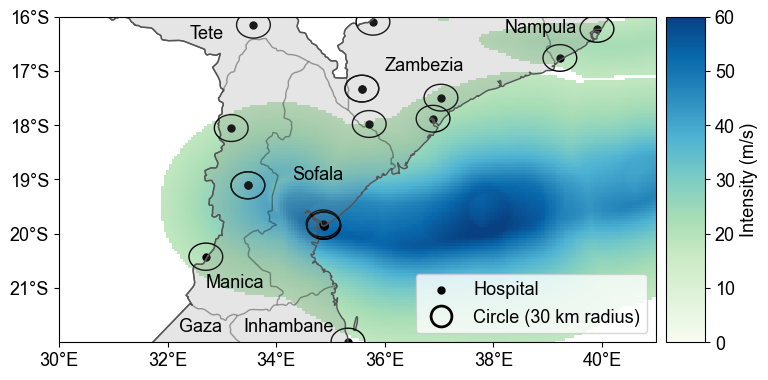

In [22]:
"""FIG 3. Idai over Central Mozambique, with hospital locations and radius of 30km"""
rad= 30*1000 #plot this radius
event = '2019063S18038' # Idai
# Idai track
idai = TCTracks.from_ibtracs_netcdf(basin=basin, storm_id=event)
idai.equal_timestep(time_step_h=0.08) #high temporal resolution for the tropical cyclone wind field
idai_wind = TropCyclone.from_tracks(idai, centroids=hazard.centroids)


plt.rcParams['font.size'] = '13'
cmap0 = LinearSegmentedColormap.from_list('', ['white', *plt.cm.GnBu(np.arange(255))])
projection= ccrs.PlateCarree()

fig3, ax3 = plt.subplots(subplot_kw={'projection':projection})
fig3.set_figwidth(fig_width*cm)
ax3.set_extent((30, 41, -22, -16))
ax3 = idai_wind.plot_intensity(event, cmap=cmap0, axis=ax3, smooth=False, vmin=0.0, vmax=60)
ax3.set_extent((30, 41, -22, -16))
ax3.set_title('')
ax3.set_yticks(ax3.get_yticks()[1:])
ax3.set_xticks(ax3.get_xticks())
ax3.scatter(hospitals_plot['longitude'], hospitals_plot['latitude'], color='k', s=25, label='Hospital')
ax3.set_extent((30, 41, -22, -16))
crs_orig = hospitals.gdf.geometry.crs
exp_gdf_metric = hospitals.gdf.geometry.to_crs(epsg=6933)
circles_metric = exp_gdf_metric.buffer(rad, cap_style=1)
circles  = circles_metric.to_crs(crs_orig)
circles.index = np.arange(0, circles.index.shape[0])

ax3.add_geometries(circles, crs=projection, edgecolor='k', facecolor='none', label='Circle (30 km radius)')
ax3.add_geometries(admin1_geo['MOZ'], crs=projection, edgecolor='k', alpha=0.2, facecolor='grey')

#annotation of regions
reg_names1 = ['Tete',
 'Manica',
 'Gaza',
 'Zambezia',
 'Inhambane',
 'Sofala',
 'Nampula']
reg_location_x = [32.4, 32.7, 32.2, 36, 33.4, 34.3, 38.2]
reg_location_y = [-16.4, -21, -21.8, -17, -21.8, -19, -16.3]
for idx, region in enumerate(reg_names1):
    # ax.annotate(reg_names[idx], (region.centroid.x, region.centroid.y))
    ax3.annotate(reg_names1[idx], (reg_location_x[idx], reg_location_y[idx]))

xlabel= ax3.get_xticks()
new_xlabel = []
for label in xlabel:
   new_xlabel.append(str(int(label))+'°E') 
ax3.set_xticklabels(new_xlabel)

ylabel= ax3.get_yticks()
new_ylabel = []
for label in ylabel:
   new_ylabel.append(str(int(-label))+'°S') 
ax3.set_yticklabels(new_ylabel)

ax3.legend(loc='lower right')
proxy_artist = mpatches.CirclePolygon((0, 0), radius=2, edgecolor='black', facecolor='none')
line4 = Line2D([], [], marker='o', markersize=15, markerfacecolor="none", markeredgecolor='k', linewidth=0, markeredgewidth=2)
handles, labels = ax3.get_legend_handles_labels()
handles.append(line4)
labels.append('Circle (30 km radius)')
ax3.legend(handles=handles, labels=labels, loc='lower right')

plt.savefig(figures_path+'Fig3.jpeg', format='jpeg', dpi=1200, bbox_inches='tight')

/Users/carmenst/micromamba/envs/climada_env_mamba/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


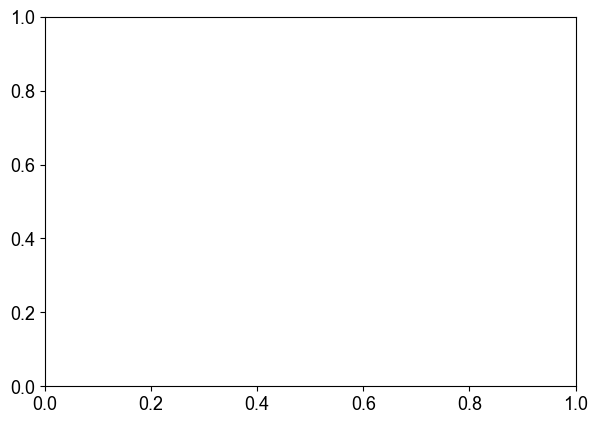

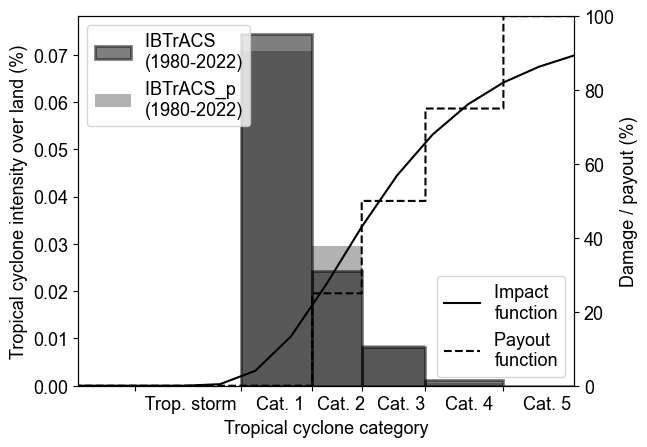

In [11]:
"""Fig4: Plotting parametric products and basis risk"""
fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
fig4.set_figwidth(fig_width*cm)
categories_plot = np.array([18, 33, 43, 50, 59, 70, 120]) #TC
ax4 = fct.plot_vul_his(hazard, categories_plot, impf, impf_id, min_structure[1])
plt.savefig(figures_path+'Fig4.jpeg', format='jpeg', dpi=1200, bbox_inches='tight')

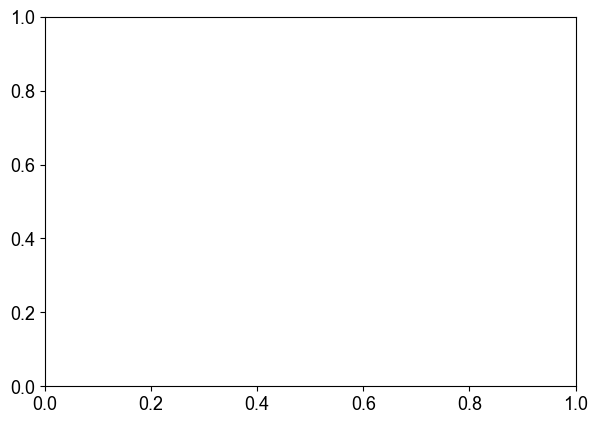

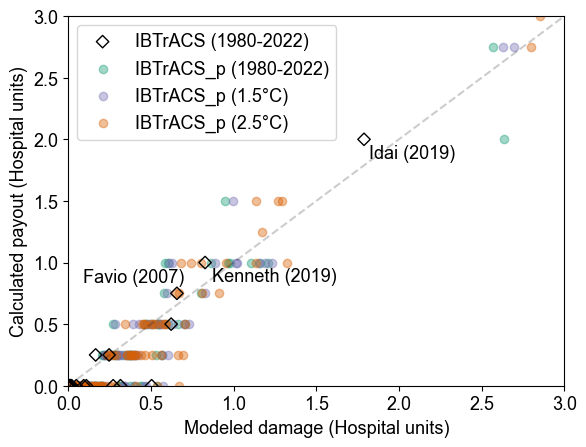

In [21]:
"""Fig.5: Parametric product both for present and future climate"""
fig5 = plt.figure()
ax5 = fig5.add_subplot(111)
fig5.set_figwidth(fig_width*cm)
ax5 = fct.plot_products(payouts_syn, impact_syn, payouts_his, impact_his, idx_min_errors)
ax5.scatter(impact_knu15.at_event, payouts_future15[48].at_event, c='#7570b3', alpha=0.4, label='IBTrACS_p (1.5°C)')
ax5.scatter(impact_knu25.at_event, payouts_future25[48].at_event, c='#d95f02', alpha=0.4,  label='IBTrACS_p (2.5°C)')
ax5 = fct.add_annotation_MOZ(impact_his, payouts_his, one_best, ax5)
plt.legend()
ax5.figure
plt.savefig(figures_path+'Fig5.jpeg', format='jpeg', dpi=1200, bbox_inches='tight')

In [19]:
"""Calculations for Fig. 6"""
#per event
big_events = np.argsort(impact_his.at_event)[-3:]
event_ids = np.asarray(impact_his.event_name)[big_events]
idx_event = impact_his.event_name.index(event_ids[-2])

nr_events = 1
list_idx = []
imp_per_region = np.zeros((nr_events,len(reg_names)))
for idx, region in enumerate(admin1_geo['MOZ']):
    clipped = geopandas.clip(hospitals.gdf.geometry, region)
    list_idx.append(clipped.index)
    impact_region = np.squeeze(np.asarray((np.sum(impact_his.imp_mat[idx_event, list_idx[idx]], axis=1))).flatten())
    imp_per_region[:, idx] = impact_region
    impact_region[ impact_region==0 ] = np.nan

dense_his_payout = np.squeeze(np.asarray(payouts_syn[48].imp_mat.todense()).flatten())
dense_his_impact = np.squeeze(np.asarray(impact_syn.imp_mat.todense()).flatten())

nonzero_impacts = np.nonzero(dense_his_impact)

steps_impact = 0.1 #10% steps
bins_impact = np.arange(0,1+steps_impact, steps_impact)
bins_payout = np.arange(0, 1.25, 0.25)
nr, bins = np.histogram(dense_his_impact[nonzero_impacts],bins=bins_impact)
centroid_bin_his = np.digitize(dense_his_impact[nonzero_impacts], bins=bins_impact)

imp_bins_with_values = np.unique(centroid_bin_his)
mean_impact = np.zeros(len(imp_bins_with_values))

for idx, binn in enumerate(imp_bins_with_values):
    mean_impact[idx] = np.mean(dense_his_impact[nonzero_impacts][np.where(centroid_bin_his==binn)])


histogram = np.zeros((len(bins), len(bins_payout)-1))
for idx_bin in range(1,len(bins)+1):
    centroid_payout = np.where(centroid_bin_his == idx_bin)
    nr_payout, _ = np.histogram(dense_his_payout[nonzero_impacts][centroid_payout], bins=bins_payout)
    histogram[idx_bin-1, :] = nr_payout
    
#plt.hist(histogram[0, ], bins_payout[:-1])

histogram_sum = np.sum(histogram, axis=1)
test = histogram.T/histogram_sum
mean_per_imp_bin = np.round(np.sum(test.T*bins_payout[:-1],axis=1)*100).astype(int)

/var/folders/02/1k8x7ccn6j178m6wswmr5h3w0000gq/T/ipykernel_51528/627392928.py:44: RuntimeWarning: invalid value encountered in divide
  test = histogram.T/histogram_sum
/var/folders/02/1k8x7ccn6j178m6wswmr5h3w0000gq/T/ipykernel_51528/627392928.py:45: RuntimeWarning: invalid value encountered in cast
  mean_per_imp_bin = np.round(np.sum(test.T*bins_payout[:-1],axis=1)*100).astype(int)


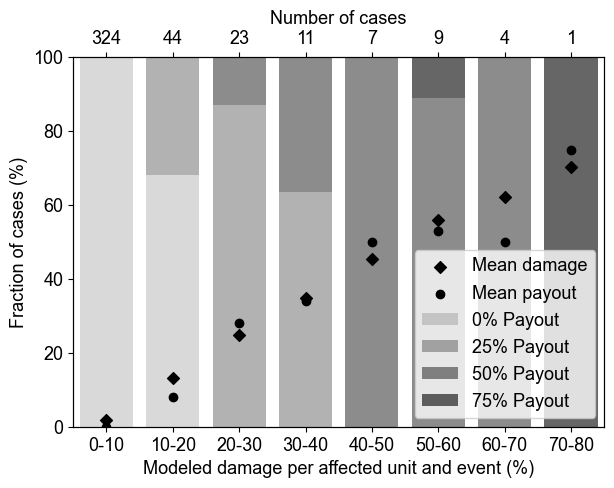

In [20]:
"""Figure 6"""
impact_colour = 'k'
payout_colour = 'k'
fig6 = plt.figure()
ax6 = fig6.add_subplot(111)
fig6.set_figwidth(fig_width*cm)
for idx in range(4):
    ax6.bar(bins_impact[1:-1], test[idx,0:len(bins_impact)-2], 0.08, label=str(idx*25)+'% Payout', 
            bottom=test[idx-1,0:len(bins_impact)-2], alpha=0.15*idx+0.15, color=payout_colour)

plt.xlim(0.05,0.85)
plt.ylim(0,1)
locs, xlabels = plt.xticks()

new_locs = bins_impact[1:-1]
newlabel = []
for idx, i in enumerate(bins_impact[:-2]):
    newlabel.append(str((i*100).astype(int))+'-'+str(((i+steps_impact)*100).astype(int)))
     
ax6.set_xticks(new_locs[:-1], newlabel[:-1])

ax6.set_xlabel('Modeled damage per affected unit and event (%)')
ax6.set_ylabel('Fraction of cases (%)')
locs, ylabels = plt.yticks()
ax6.set_yticks(locs, (locs*100).astype(int))

ax62 = ax6.twiny()
ax62.set_xlim(ax6.get_xlim())
ax62.set_xticks(new_locs[:-1],nr[:-2].tolist(),c=impact_colour)
ax62.set_xlabel('Number of cases', c=impact_colour)

ax6.scatter(bins_impact[1:-2], mean_impact, label='Mean damage', marker='D', c=impact_colour)
ax6.scatter(bins_impact[1:-2], mean_per_imp_bin[:-3]/100, c=payout_colour, label='Mean payout')

ax6.legend(loc='lower right')
plt.savefig(figures_path+'Fig6.jpeg', format='jpeg', dpi=1200, bbox_inches='tight')

# References
Eckstein D, Künzel Vera, Schäfer Laura (2021) Global Climate Risk Index 2021. Who suffers Most from Extreme Weather Events? Weather-related Loss Events in 2019 and 2000 to 2019. Germanwatch eV URL https://www.germanwatch.org/en/19777

UNDP (2019) Mozambique Cyclone Idai Post-Disaster Needs Assessment - Full Report. Tech. rep.